<a href="https://colab.research.google.com/github/laxmikhilnani20/DS_Mini_Project/blob/main/FinalLabPractical/DiabatiesDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import pandas as pd

df = pd.read_csv('/content/diabetes[1].csv')
display(df.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [44]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [45]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [46]:
import numpy as np

# Columns with potentially implausible zero values
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"Number of zero values in '{col}': {zero_count}")

Number of zero values in 'Glucose': 5
Number of zero values in 'BloodPressure': 35
Number of zero values in 'SkinThickness': 227
Number of zero values in 'Insulin': 374
Number of zero values in 'BMI': 11


### Handling Zero Values: BloodPressure Column

Replacing zero values in the `BloodPressure` column with the median of non-zero values.

In [47]:
# Calculate the median of 'BloodPressure' excluding zero values
median_bloodpressure = df[df['BloodPressure'] != 0]['BloodPressure'].median()

# Replace zero values in 'BloodPressure' with the calculated median
df['BloodPressure'] = df['BloodPressure'].replace(0, median_bloodpressure)

print(f"Median of non-zero BloodPressure values: {median_bloodpressure}")
print("Zero values in 'BloodPressure' replaced with median.")

# Verify the change
zero_count_bp_after = (df['BloodPressure'] == 0).sum()
print(f"Number of zero values in 'BloodPressure' after replacement: {zero_count_bp_after}")

display(df.head())

Median of non-zero BloodPressure values: 72.0
Zero values in 'BloodPressure' replaced with median.
Number of zero values in 'BloodPressure' after replacement: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Handling Zero Values: SkinThickness Column

Replacing zero values in the `SkinThickness` column with the median of non-zero values.

In [48]:
# Calculate the median of 'SkinThickness' excluding zero values
median_skinthickness = df[df['SkinThickness'] != 0]['SkinThickness'].median()

# Replace zero values in 'SkinThickness' with the calculated median
df['SkinThickness'] = df['SkinThickness'].replace(0, median_skinthickness)

print(f"Median of non-zero SkinThickness values: {median_skinthickness}")
print("Zero values in 'SkinThickness' replaced with median.")

# Verify the change
zero_count_st_after = (df['SkinThickness'] == 0).sum()
print(f"Number of zero values in 'SkinThickness' after replacement: {zero_count_st_after}")

display(df.head())

Median of non-zero SkinThickness values: 29.0
Zero values in 'SkinThickness' replaced with median.
Number of zero values in 'SkinThickness' after replacement: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,29,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Handling Zero Values: Insulin Column

Replacing zero values in the `Insulin` column with the median of non-zero values.

In [49]:
# Calculate the median of 'Insulin' excluding zero values
median_insulin = df[df['Insulin'] != 0]['Insulin'].median()

# Replace zero values in 'Insulin' with the calculated median
df['Insulin'] = df['Insulin'].replace(0, median_insulin)

print(f"Median of non-zero Insulin values: {median_insulin}")
print("Zero values in 'Insulin' replaced with median.")

# Verify the change
zero_count_insulin_after = (df['Insulin'] == 0).sum()
print(f"Number of zero values in 'Insulin' after replacement: {zero_count_insulin_after}")

display(df.head())

Median of non-zero Insulin values: 125.0
Zero values in 'Insulin' replaced with median.
Number of zero values in 'Insulin' after replacement: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Handling Zero Values: BMI Column

Replacing zero values in the `BMI` column with the median of non-zero values.

In [50]:
# Calculate the median of 'BMI' excluding zero values
median_bmi = df[df['BMI'] != 0]['BMI'].median()

# Replace zero values in 'BMI' with the calculated median
df['BMI'] = df['BMI'].replace(0, median_bmi)

print(f"Median of non-zero BMI values: {median_bmi}")
print("Zero values in 'BMI' replaced with median.")

# Verify the change
zero_count_bmi_after = (df['BMI'] == 0).sum()
print(f"Number of zero values in 'BMI' after replacement: {zero_count_bmi_after}")

display(df.head())

Median of non-zero BMI values: 32.3
Zero values in 'BMI' replaced with median.
Number of zero values in 'BMI' after replacement: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### Verification of Zero Value Handling

Finally, let's confirm that all specified columns now have no zero values.

In [51]:
# Calculate the median of 'Glucose' excluding zero values
median_glucose = df[df['Glucose'] != 0]['Glucose'].median()

# Replace zero values in 'Glucose' with the calculated median
df['Glucose'] = df['Glucose'].replace(0, median_glucose)

print(f"Median of non-zero Glucose values: {median_glucose}")
print("Zero values in 'Glucose' replaced with median.")

# Verify the change by checking the number of zero values after replacement
zero_count_glucose_after = (df['Glucose'] == 0).sum()
print(f"Number of zero values in 'Glucose' after replacement: {zero_count_glucose_after}")

# Display the first few rows to show the updated column
display(df.head())

Median of non-zero Glucose values: 117.0
Zero values in 'Glucose' replaced with median.
Number of zero values in 'Glucose' after replacement: 0


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

print("Number of zero values after imputation:")
for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    print(f"'{col}': {zero_count}")

Number of zero values after imputation:
'Glucose': 0
'BloodPressure': 0
'SkinThickness': 0
'Insulin': 0
'BMI': 0


Intercept: -1.50
Coefficient for Age: 0.16
R-squared: 0.25


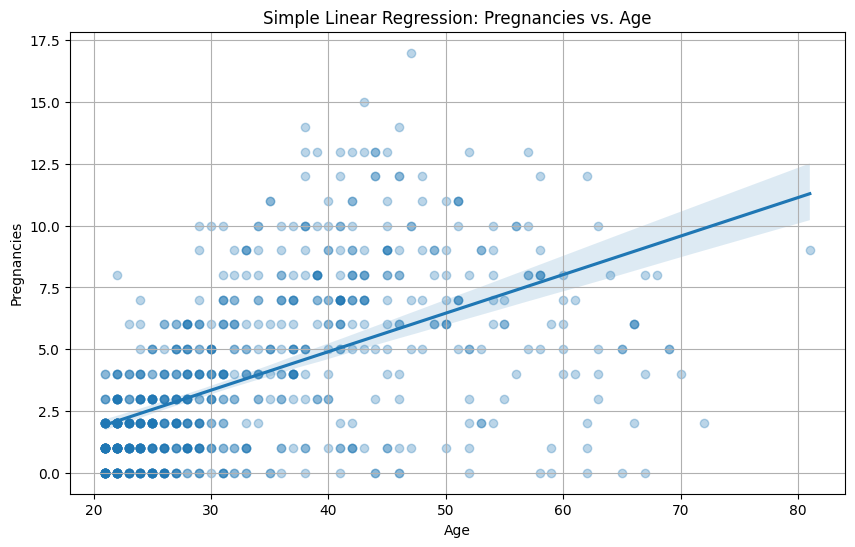

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Define independent and dependent variables for simple linear regression
X = df[['Age']]  # Independent variable (feature)
y = df['Pregnancies'] # Dependent variable (target)

# Split data into training and testing sets (optional for simple regression, but good practice)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
r2 = r2_score(y_test, y_pred)

print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Age: {model.coef_[0]:.2f}")
print(f"R-squared: {r2:.2f}")

# Plotting the regression line
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Pregnancies', data=df, scatter_kws={'alpha':0.3})
plt.title('Simple Linear Regression: Pregnancies vs. Age')
plt.xlabel('Age')
plt.ylabel('Pregnancies')
plt.grid(True)
plt.show()

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features (X) and target (y) for multiple linear regression
# Exclude 'Outcome' and 'BMI' from features, as 'BMI' is our target.
X = df.drop(['Outcome', 'BMI'], axis=1)
y = df['BMI']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets for Multiple Linear Regression.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

Data split into training and testing sets for Multiple Linear Regression.
X_train shape: (614, 7)
y_train shape: (614,)
X_test shape: (154, 7)
y_test shape: (154,)


In [55]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [56]:
# Initialize the Multiple Linear Regression model
multi_linear_model = LinearRegression()

# Train the model on the training data
multi_linear_model.fit(X_train, y_train)

print("Multiple Linear Regression model trained successfully.")

Multiple Linear Regression model trained successfully.


In [57]:
# Make predictions on the test set
y_pred_mlr = multi_linear_model.predict(X_test)

# Evaluate the model
r2_mlr = r2_score(y_test, y_pred_mlr)
mse_mlr = mean_squared_error(y_test, y_pred_mlr)
rmse_mlr = np.sqrt(mse_mlr)

print(f"R-squared for Multiple Linear Regression: {r2_mlr:.2f}")
print(f"Mean Squared Error for Multiple Linear Regression: {mse_mlr:.2f}")
print(f"Root Mean Squared Error for Multiple Linear Regression: {rmse_mlr:.2f}")

# Display coefficients for each feature
print("\nCoefficients for each feature:")
for feature, coef in zip(X.columns, multi_linear_model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept: {multi_linear_model.intercept_:.2f}")

R-squared for Multiple Linear Regression: 0.20
Mean Squared Error for Multiple Linear Regression: 34.79
Root Mean Squared Error for Multiple Linear Regression: 5.90

Coefficients for each feature:
Pregnancies: -0.01
Glucose: 0.03
BloodPressure: 0.11
SkinThickness: 0.42
Insulin: 0.00
DiabetesPedigreeFunction: 1.63
Age: -0.09
Intercept: 10.35


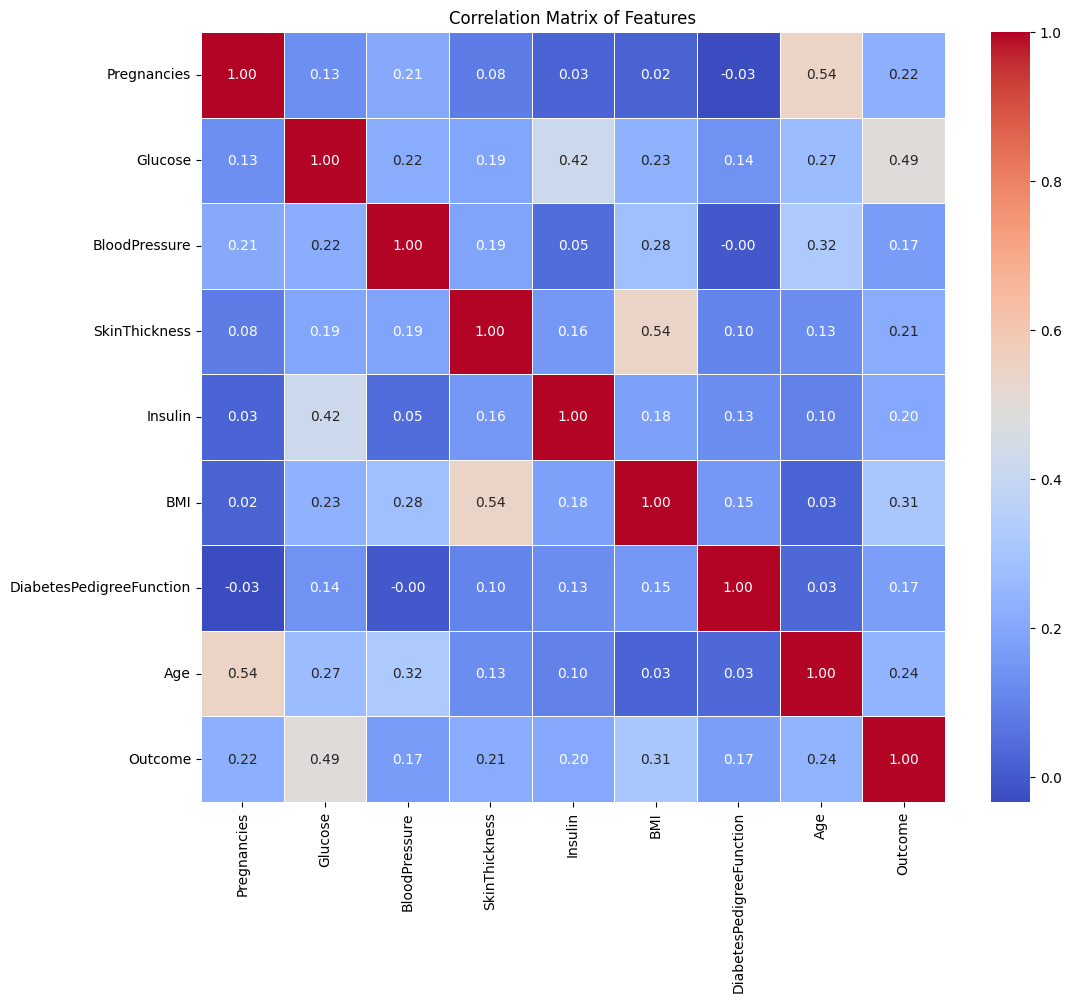

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

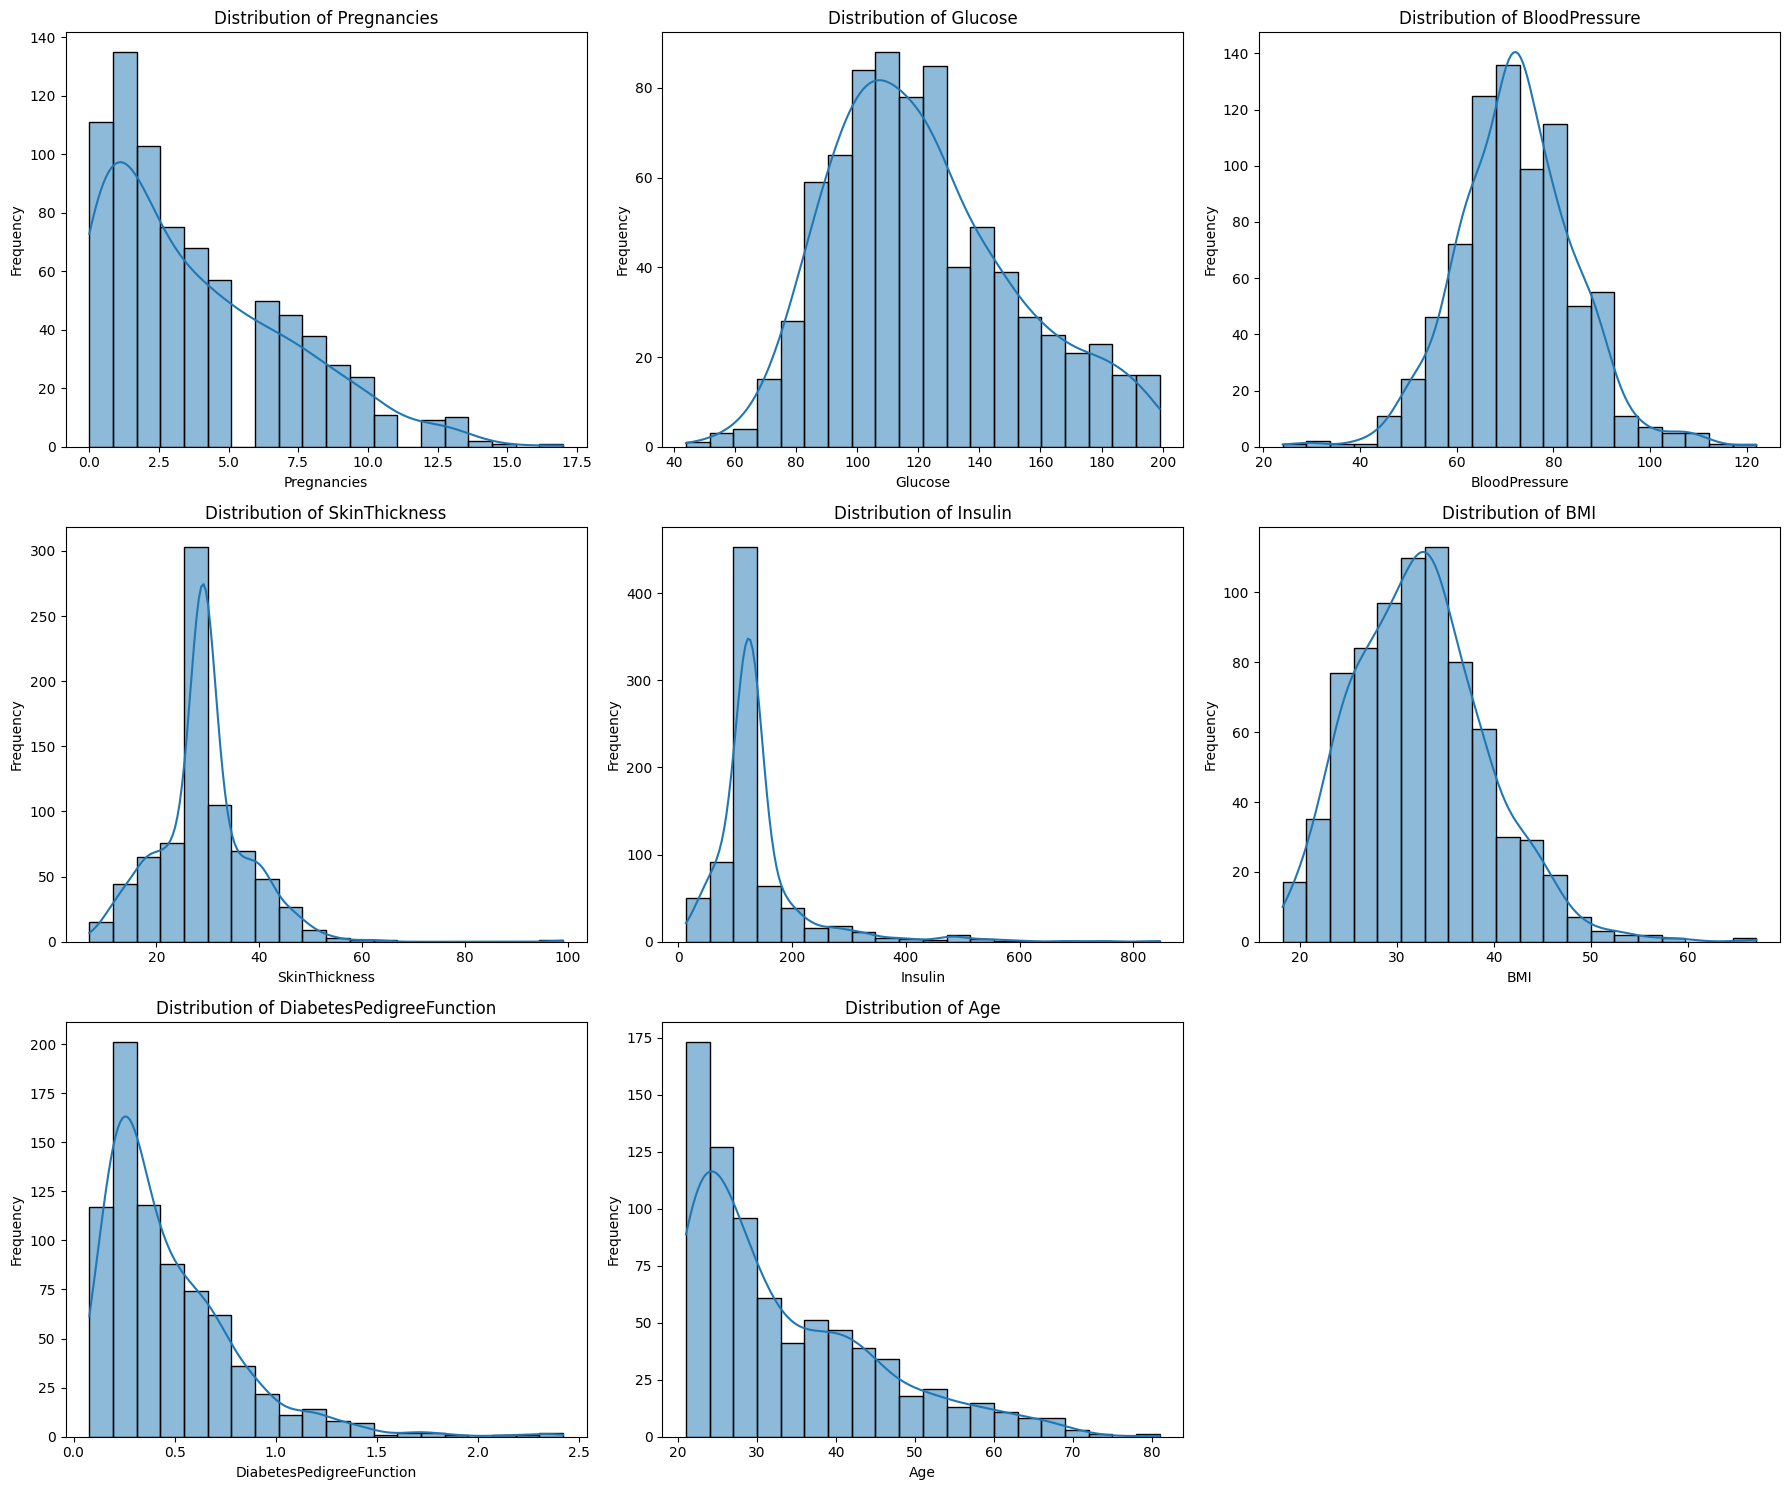

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get all columns except the 'Outcome' column
features = df.columns.drop('Outcome')

# Set up the matplotlib figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 15))
axes = axes.flatten()

# Plot a histogram for each feature
for i, col in enumerate(features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=20)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any unused subplots if the number of features is not a perfect square
if len(features) < len(axes):
    for j in range(len(features), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

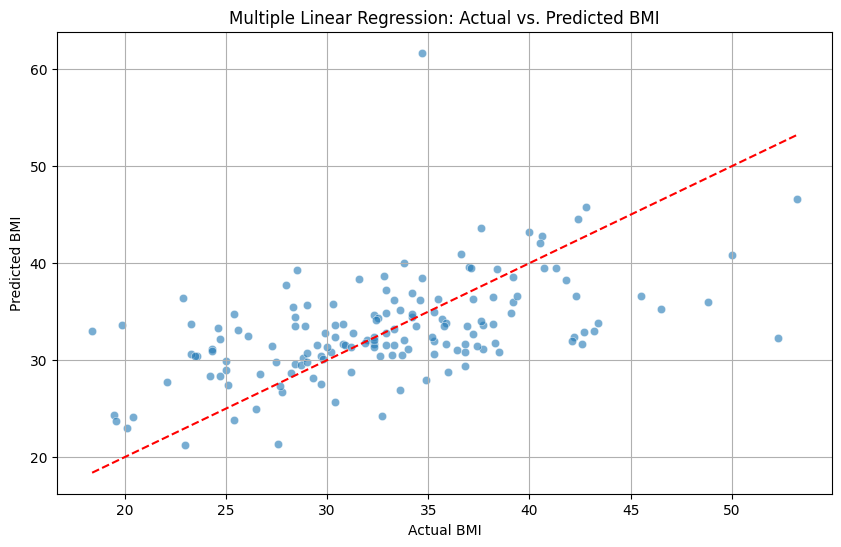

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_mlr, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--') # 45-degree line
plt.title('Multiple Linear Regression: Actual vs. Predicted BMI')
plt.xlabel('Actual BMI')
plt.ylabel('Predicted BMI')
plt.grid(True)
plt.show()

### Multiple Linear Regression: Residuals vs. Predicted BMI

This plot displays the residuals (the difference between actual and predicted BMI) against the predicted `BMI` values. It's used to check the assumptions of linearity and homoscedasticity. Ideally, the residuals should be randomly scattered around the zero line, with no discernible pattern.

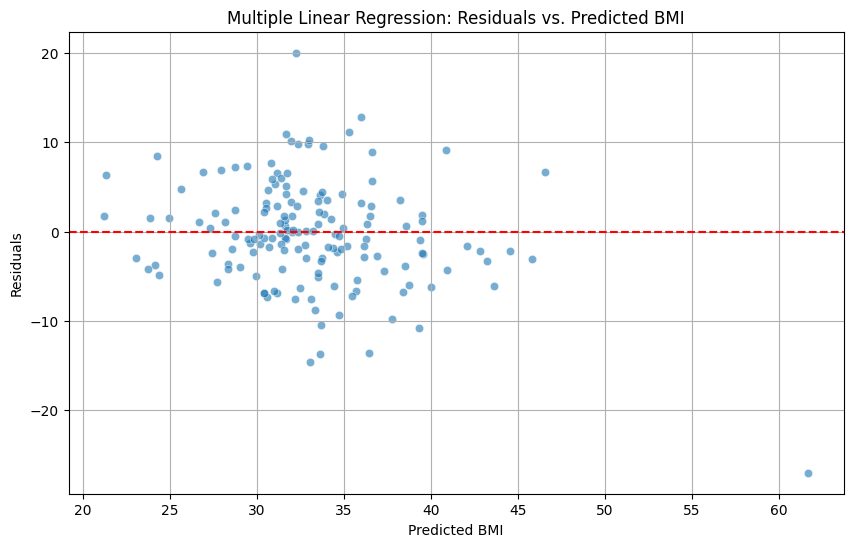

In [61]:
residuals = y_test - y_pred_mlr

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_mlr, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--') # Zero line
plt.title('Multiple Linear Regression: Residuals vs. Predicted BMI')
plt.xlabel('Predicted BMI')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

/tmp/ipython-input-2708804142.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


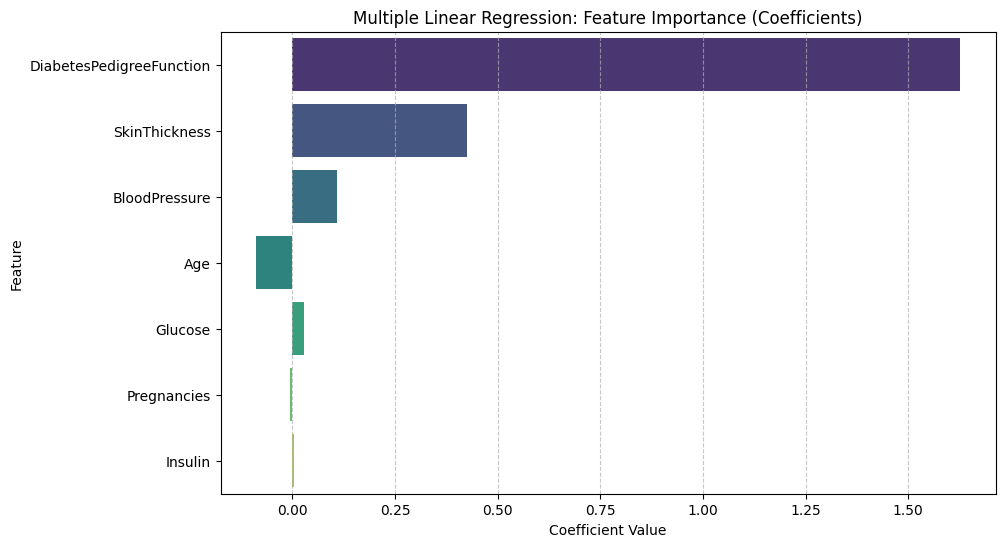

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get feature names and coefficients
feature_names = X.columns
coefficients = multi_linear_model.coef_

# Create a DataFrame for easier plotting
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort by absolute coefficient value for better visualization
coef_df['Abs_Coefficient'] = np.abs(coef_df['Coefficient'])
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Multiple Linear Regression: Feature Importance (Coefficients)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Multiple Linear Regression: Q-Q Plot of Residuals

The Quantile-Quantile (Q-Q) plot is used to assess if the residuals (the differences between actual and predicted values) follow a normal distribution. If the residuals are normally distributed, the points in the Q-Q plot should approximately lie along the 45-degree line. Deviations from this line indicate departures from normality, which is an assumption of linear regression.

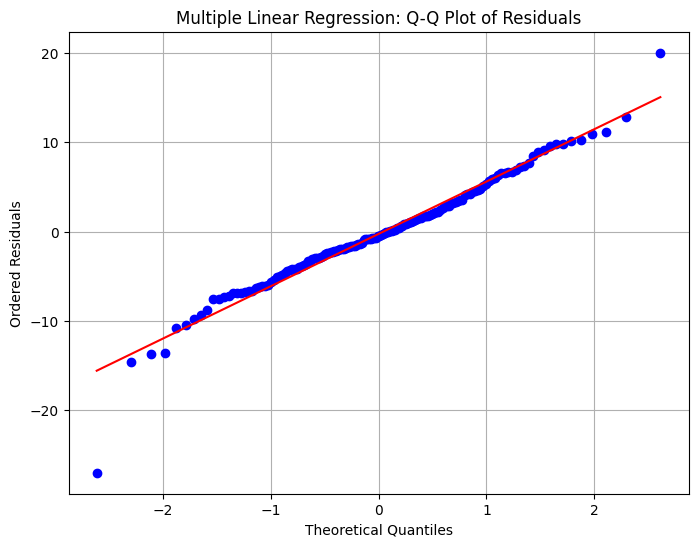

In [63]:
import scipy.stats as stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Multiple Linear Regression: Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Residuals')
plt.grid(True)
plt.show()